In [1]:
import os
import pandas as pd
import numpy as np
from ggplot import *
import seaborn as sns

In [2]:
dir_proj = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation'
dir_data = os.path.join(dir_proj, 'data', 'REFITPowerData111215')

In [62]:
def _calc_diff(df, col, assume_start=True):
    '''
    Assume start means that 
    '''
    if assume_start:
        return np.append(df[col].diff()[1:], 6.).astype(int)
    else:
        return np.append(6., df[col].diff()[1:]).astype(int)

    
def _load_csv(filename, columns, tz):
    """
    Parameters
    ----------
    filename : str
    columns : list of tuples (for hierarchical column index)
    tz : str e.g. 'US/Eastern'
    Returns
    -------
    dataframe
    """
    # Load data
    df = pd.read_csv(filename, names=columns)
    
    # Convert the integer index column to timezone-aware datetime 
    # df['Timestamp'] = pd.to_datetime(df.Timestamp, unit='s', utc=True)
    # df.set_index('Timestamp', inplace=True)
    # df = df.tz_localize('GMT').tz_convert(tz)
    df['Duration'] = _calc_diff(df, 'Timestamp')
    df['Duration2'] = _calc_diff(df, 'Timestamp', False)
    df['AggregateDiff'] = np.log(1 + np.absolute(_calc_diff(df, 'Aggregate')))
    df['AggregateDiff2'] = np.log(1 + np.absolute(_calc_diff(df, 'Aggregate', False)))

    return df

In [63]:
tz = 'US/Eastern'
house_id = 5
input_path = dir_data
csv_filename = os.path.join(input_path, 'House{}.csv'.format(house_id))
appliance_cols = ['Appliance{}'.format(i) for i in range(1,10)]
columns = ['Timestamp', 'Aggregate'] + appliance_cols
df = _load_csv(csv_filename, columns, tz)

In [64]:
df

,Timestamp,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Duration,Duration2,AggregateDiff,AggregateDiff2
0,1380189369,275,2,0,0,0,11,0,0,0,0,7,6,1.098612,1.945910
1,1380189376,273,2,0,0,0,11,0,0,0,0,6,7,0.000000,1.098612
2,1380189382,273,2,0,0,0,11,0,0,0,0,7,6,0.000000,0.000000
3,1380189389,273,2,0,0,0,11,0,0,0,0,6,7,1.791759,0.000000
4,1380189395,278,2,0,0,0,11,0,0,0,0,7,6,1.098612,1.791759
5,1380189402,276,2,0,0,0,11,0,0,0,0,8,7,0.693147,1.098612
6,1380189410,277,1,0,0,0,11,0,0,0,0,7,8,0.693147,0.693147
7,1380189417,278,2,0,0,0,11,0,0,0,0,6,7,0.693147,0.693147
8,1380189423,279,2,0,0,0,11,0,0,0,0,5,6,0.000000,0.693147
9,1380189428,279,2,0,0,0,11,0,0,0,0,2,5,0.693147,0.000000


In [69]:
day_len = df.shape[0] / 365 / 2
print day_len
df[day_len:2*day_len]

11231


,Timestamp,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Duration,Duration2,AggregateDiff,AggregateDiff2
11231,1380259769,1236,2,0,0,0,11,0,0,0,0,6,7,3.218876,3.433987
11232,1380259775,1212,2,0,0,0,11,0,0,0,0,7,6,1.386294,3.218876
11233,1380259782,1215,2,0,0,0,11,0,0,0,0,8,7,1.609438,1.386294
11234,1380259790,1211,2,0,0,0,11,0,0,0,0,7,8,2.772589,1.609438
11235,1380259797,1226,2,0,0,0,11,0,0,0,0,6,7,2.772589,2.772589
11236,1380259803,1211,2,0,0,0,11,0,0,0,0,5,6,1.098612,2.772589
11237,1380259808,1213,1,0,0,0,11,0,0,0,0,2,5,0.000000,1.098612
11238,1380259810,1213,1,0,0,0,11,0,0,0,0,6,2,0.000000,0.000000
11239,1380259816,1213,2,0,0,0,11,0,0,0,0,5,6,0.000000,0.000000
11240,1380259821,1213,2,0,0,0,11,0,0,0,0,8,5,0.000000,0.000000


In [90]:
type(df['Aggregate'])

pandas.core.series.Series

In [61]:
print (8000000/365/2)

10958


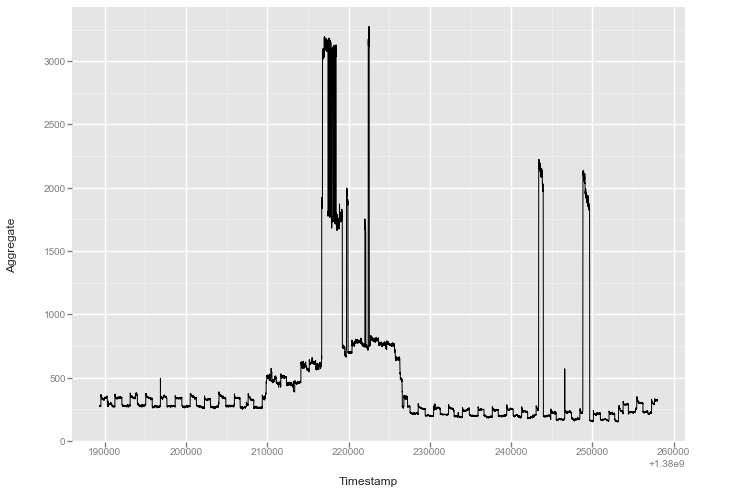

<ggplot: (310633405)>

In [89]:
ggplot(df[:(8000000/365/2)], aes('Timestamp', 'Aggregate')) + geom_line()

In [58]:
# sns.pointplot(x="Timestamp", y="Aggregate", data=df[:(8000000/365)])

In [47]:
# ggplot(df[df['Duration'] < 30], aes('Duration')) + geom_histogram(bins=30)

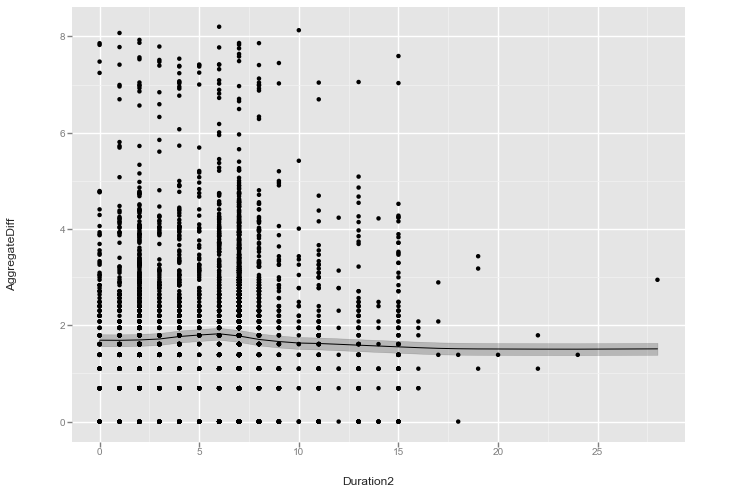

<ggplot: (290799097)>

In [52]:
# Correlation between electricity usage and diff?
ggplot(df[df['Duration2'] < 30].sample(5000), aes('Duration2', 'AggregateDiff')) + geom_point() + stat_smooth(method='loess')

In [6]:
print np.mean(df[df['Duration'] < 30]['Duration'])
print np.mean(df[df['Duration'] < 30]['Duration'])
print np.median(df[df['Duration'] < 30]['Duration'])

6.13677373341
6.13677373341
7.0


In [7]:
print 1 - np.mean(df['Duration'] < 30)

0.00162610034986


In [ ]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
from copy import deepcopy
from os.path import join, isdir, isfile
from os import listdir
import fnmatch
import re
from sys import stdout
from nilmtk.utils import get_datastore
from nilmtk.datastore import Key
from nilmtk.timeframe import TimeFrame
from nilmtk.measurement import LEVEL_NAMES
from nilmtk.utils import get_module_directory, check_directory_exists
from nilm_metadata import convert_yaml_to_hdf5, save_yaml_to_datastore


def convert_refit(input_path, output_filename, format='HDF'):
    """
    Parameters
    ----------
    input_path : str
        The root path of the CSV files, e.g. House1.csv
    output_filename : str
        The destination filename (including path and suffix).
    format : str
        format of output. Either 'HDF' or 'CSV'. Defaults to 'HDF'
    """
        
    # Open DataStore
    store = get_datastore(output_filename, format, mode='w')

    # Convert raw data to DataStore
    _convert(input_path, store, 'Europe/London')

    # Add metadata
    save_yaml_to_datastore(join(get_module_directory(), 
                              'dataset_converters', 
                              'refit', 
                              'metadata'),
                         store)
    store.close()

    print("Done converting REFIT to HDF5!")

def _convert(input_path, store, tz, sort_index=True):
    """
    Parameters
    ----------
    input_path : str
        The root path of the REFIT dataset.
    store : DataStore
        The NILMTK DataStore object.
    measurement_mapping_func : function
        Must take these parameters:
            - house_id
            - chan_id
        Function should return a list of tuples e.g. [('power', 'active')]
    tz : str 
        Timezone e.g. 'US/Eastern'
    sort_index : bool
    """

    check_directory_exists(input_path)

    # Iterate though all houses and channels
    # house 14 is missing!
    houses = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21]
    nilmtk_house_id = 0
    for house_id in houses:
        nilmtk_house_id += 1
        print("Loading house", house_id, end="... ")
        stdout.flush()
        csv_filename = input_path + 'House' + str(house_id) + '.csv'
        columns = ['Timestamp','Aggregate','Appliance1','Appliance2','Appliance3','Appliance4','Appliance5','Appliance6','Appliance7','Appliance8','Appliance9']
        df = _load_csv(csv_filename, columns, tz)
        if sort_index:
            df = df.sort_index() # might not be sorted...
        chan_id = 0
        for col in df.columns:
            chan_id += 1
            print(chan_id, end=" ")
            stdout.flush()
            key = Key(building=nilmtk_house_id, meter=chan_id)
            
            chan_df = pd.DataFrame(df[col])
            chan_df.columns = pd.MultiIndex.from_tuples([('power', 'active')])
            
            # Modify the column labels to reflect the power measurements recorded.
            chan_df.columns.set_names(LEVEL_NAMES, inplace=True)
            
            store.put(str(key), chan_df)
        print('')

def _load_csv(filename, columns, tz):
    """
    Parameters
    ----------
    filename : str
    columns : list of tuples (for hierarchical column index)
    tz : str e.g. 'US/Eastern'
    Returns
    -------
    dataframe
    """
    # Load data
    df = pd.read_csv(filename, names=columns)
    
    # Convert the integer index column to timezone-aware datetime 
    df['Timestamp'] = pd.to_datetime(df.Timestamp, unit='s', utc=True)
    df.set_index('Timestamp', inplace=True)
    df = df.tz_localize('GMT').tz_convert(tz)

    return df